<a href="https://colab.research.google.com/github/valerialrc/ufv/blob/main/ELT576/ELT576_AtividadePratica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELT 576 - Processamento Inteligente de Sinais
#### Professores: Leonardo B. Felix e Rodolpho V. A. Neves
## Curso de Especialização em Inteligência Computacional e Artificial
## Desafio da Semana 3

## Análise espectral

In [ ]:
# bibliotecas importantes para o Roteiro
from matplotlib import pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq, irfft

import numpy as np
import cv2

### 1. Domínio do tempo $\Leftrightarrow$ Domínio da frequência

A faixa de frequência do espectro de um sinal é relacionada com sua frequência de
amostragem através do teorema da amostragem: "A frequência de amostragem deve ser maior que o dobro da maior frequência contida no sinal". No exemplo abaixo, está representada a transformada de Fourier de uma soma de senóides com ruído, onde a frequência de amostragem é Fs = 8000 Hz. Neste caso, a largura do espectro está na faixa [-4000,4000] Hz. Tanto o sinal no domínio do tempo quanto no domínio da frequência tem o mesmo número de pontos e a resolução em frequência (ou $\Delta f$) é inversamente proporcional ao número de pontos. A transformada de Fourier é obtida através do comando fft, o qual implementa o algoritmo "Fast Fourier Transform". Se o sinal for periódico, a transformada se reduz à série de Fourier.


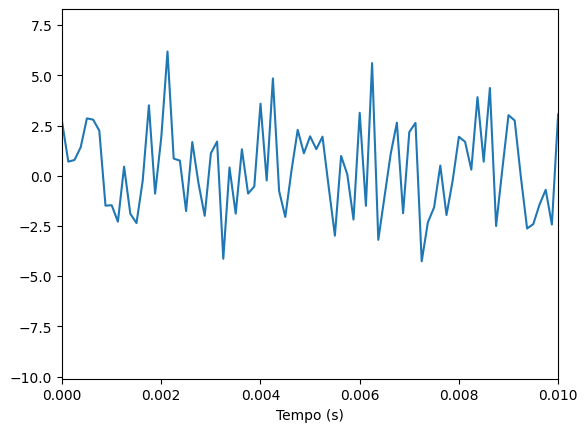

In [ ]:
Fs = 8000 # frequencia de amostragem
L = 10000 # tamanho do vetor de frequencias

t = np.arange(0, (L-1)/Fs, 1/Fs) # declaracao do vetor de tempo
x = 0.7*np.sin(2 * np.pi * 500 * t) + 1*np.sin(2 * np.pi * 2000 * t) + 2*np.random.normal(0,1,L-1) # sinal que iremos analisar


plt.plot(t,x)
plt.xlim(0, 0.01) # limites para conseguir ver os detalhes do sinal
plt.xlabel('Tempo (s)')
plt.show()
X = fft(x)


O resultado do comando fft, no python, é uma transformada simétrica em relação ao eixo x. Todavia, apenas a primeira metade dos pontos é inédita quando lidamos com sinais reais, sendo necessário plotar somente metade para se ter informação sobre o espectro do sinal.

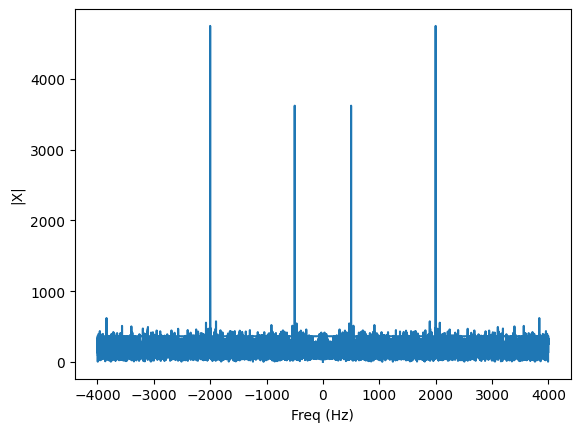

In [ ]:
xf = fftfreq(L-1, 1/Fs) # L-1 por causa do indice 0
plt.plot(xf,np.absolute(X))
plt.xlabel("Freq (Hz)")
plt.ylabel("|X|")
plt.show()

O código abaixo obtêm o espectro centralizado e apenas da parte positiva da frequência que corresponde a metade inédita.

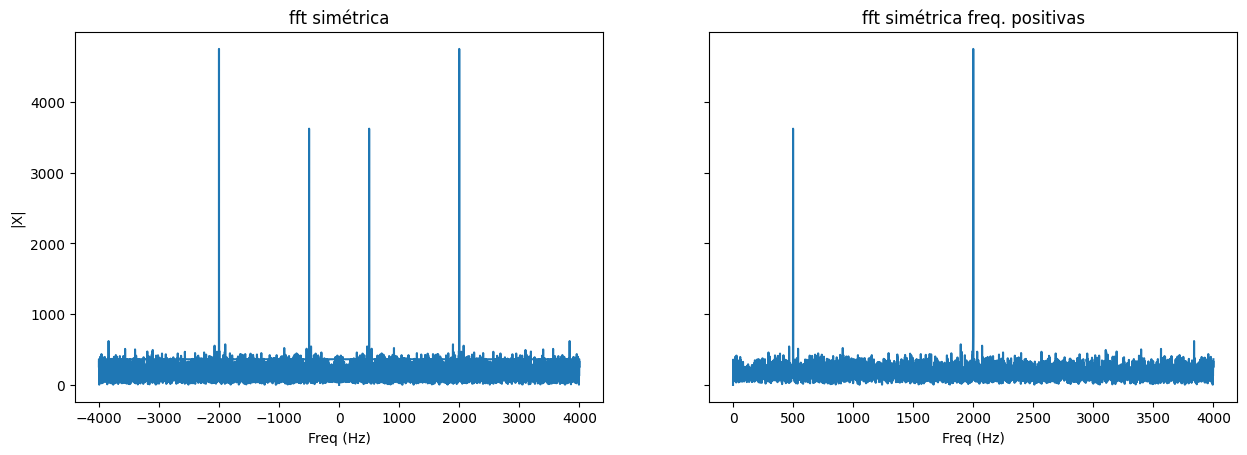

In [ ]:
# normalmente, somente a parte positiva das frequencias e plotada
xf_pos = fftfreq(L, 1/Fs)[0:L//2]


fig, axs = plt.subplots(1,2,sharey=True)
fig.set_figwidth(15)
axs[0].plot(xf,np.absolute(X))
axs[0].set_xlabel("Freq (Hz)")
axs[0].set_ylabel("|X|")
axs[0].set_title("fft simétrica")

axs[1].plot(xf_pos,np.absolute(X[0:L//2]))
axs[1].set_xlabel("Freq (Hz)")
axs[1].set_title("fft simétrica freq. positivas")

plt.show()

Experimente verificar o espectro de outros sinais. Note que o sinal simulado possui número par de pontos, portanto L/2 é inteiro. Se o tamanho do sinal for ímpar, então é melhor omitir a última amostra do sinal, por exemplo x=x[0:len(x)-1], para evitar erros de indexação.

Para retornar um espectro para o domínio do tempo usa-se o comando irfft, como mostrado abaixo.

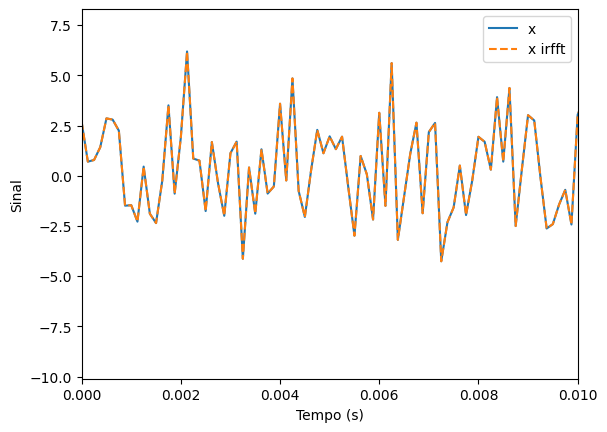

In [ ]:
# transformada inversa de fourier para reconstrucao do sinal
x_new = irfft(X, n=len(t))

plt.plot(t,x, label='x')
plt.plot(t,x_new, "--", label='x irfft')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal')
plt.xlim(0, 0.01) # limites para conseguir ver a senoide
plt.show()

### 2. Transformada de Fourier de curta duração

Os métodos de Fourier estudados até o momento limitam-se a análises de sinais cujo espectro é constante ao longo do tempo, isto é, qualquer sinal submetido à análise de Fourier precisa ser estacionário. Este é um conceito estatístico que significa que a dinâmica do sinal é a mesma desde o início até o fim da série temporal. Esta propriedade é importante pois garante que a transformada inversa de um espectro resultará exatamente no sinal original. Todavia, existem inúmeros sinais na natureza que não se encaixam nesta restrição; por exemplo: sinais de voz, sinais biomédicos etc. Assim, é interessante que existam métodos para a análise tempo X frequência, de forma que se possa verificar a evolução do conteúdo espectral de um sinal mesmo numa realidade não-estacionária.

### Exemplo - Análise espectral tradicional (somente frequência)

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from matplotlib import pyplot as plt

In [ ]:
Fs = 10000 # frequencia de amostragem
t = np.arange(0,3,1/Fs)
f0 =  150
t1 = 3
f1 = 450
B = (f1-f0)/t1
y = np.cos(2*np.pi*(f0*t*B/2*np.power(t,2)))
Y = np.absolute(fft(y))
freq = fftfreq(len(y),1/Fs)[0:len(y)//2]

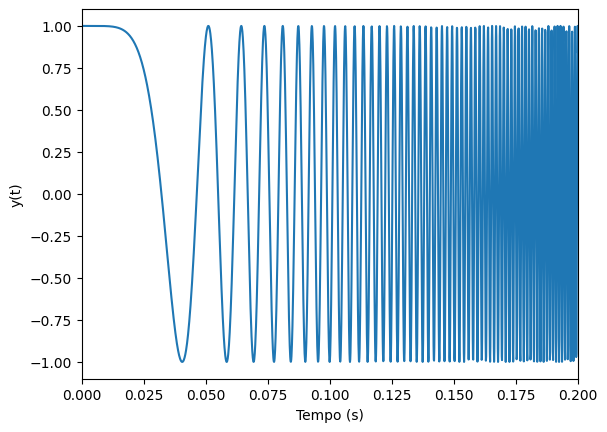

In [ ]:
# plot do sinal y no tempo
plt.plot(t,y)
plt.xlim(0, 0.2) # limites para conseguir ver a senoide
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.show()

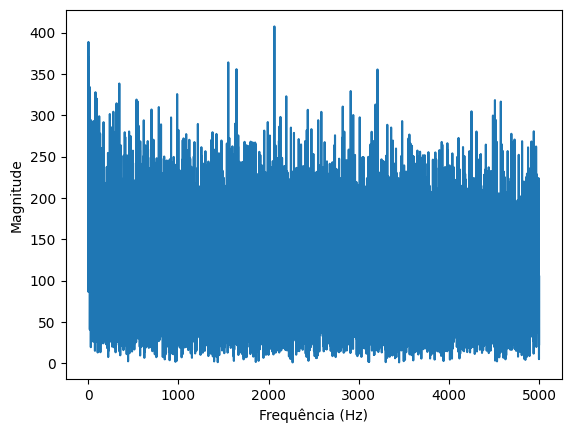

In [ ]:
plt.figure()
plt.plot(freq,Y[0:len(Y)//2])
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.show()

A análise espectral tradicional indica que o sinal possui um conteúdo espectral entre 150 e 450 Hz. Porém, não é possível identificar a informação temporal de aumento da frequência, como se pode conferir com a reprodução do som (use o soundsc, por exemplo Não esqueça de entrar com a frequência de amostagem, que nesse caso é 1000 Hz). Vejamos agora uma análise tempo X frequência do mesmo sinal.

In [ ]:
# biblioteca para tocar audio no python (Google Colab)
from IPython.display import Audio

# tocando o sinal de frequencia variavel criado
Audio(y,rate=Fs)

### Análise espectral - frequência e tempo

Para ver um sinal no tempo e na frequência ao mesmo tempo é preciso construir um espectrograma, o qual também é chamado de transformada de Fourier de curta duração. O espectrograma divide o sinal em janelas, realiza a transformada de Fourier de cada janela e plota a análsie espectral de cada janela. Dessa forma, é possível ver como o conteúdo espectral de um sinal muda em função do tempo.

1. O sinal x é dividido em janelas de tamanho $nwin$ com $nolap$ amostras de sobreposição entre as janelas adjacentes. Em cada janela é aplicada uma FFT de
$nfft$ pontos.

2. A função "espectrograma", disponibilizada abaixo, calcula o espectrograma de um sinal e retorna os vetores relativos ao tempo e frequência.

In [ ]:
# importando as bibliotecas
import numpy as np
from scipy import signal
from scipy.fft import fftshift

from matplotlib import pyplot as plt

In [ ]:
# declarando o sinal e calculando os pontos do espectrograma
Fs = 100000
t = np.arange(0,3,1/Fs)
f0 =  150
t1 = 3
f1 = 450
B = (f1-f0)/t1
y = np.cos(2*np.pi*(f0*t*B/2*np.power(t,2)))
f, t, Sxx = signal.spectrogram(y, Fs)

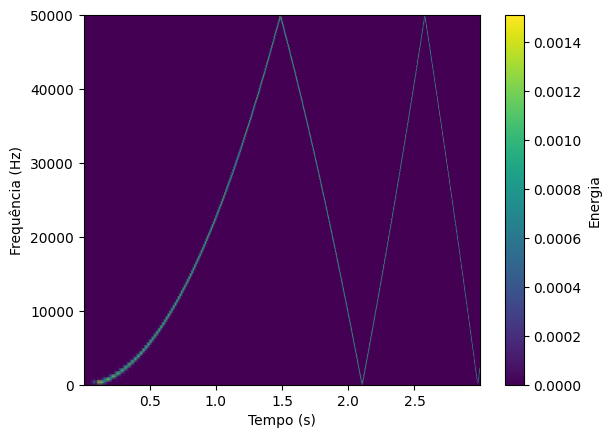

In [ ]:
# plotando o espectrograma para as frequencias positivas
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.colorbar(label='Energia')
plt.show()

O que você achou do espectrograma? Quais outras aplicações você daria para esta técnica?

## 3. Esteganografia ou "Ouvir imagens?"

Como visto, o espectrograma é uma representação gráfica, uma imagem, que carrega as informações temporais das frequências que compõem o sinal. Isto indica que cada pixel tem uma amplitude e uma frequência associadas. Usando um pouco de manipulação de informações espectrais, é possível "esconder"informações dentro de sinais, numa espécie de esteganografia (- dê um google neste termo). Para verificar e extrair informações escondidas em sinais unidimensionais - como são os sinais de áudio - pode-se usar o espectrograma.

1. Carregue o arquivo lena.wav usando o comando 'wavfile', da biblioteca 'scipy.io'. Ouça o som usando o comando 'Audio', da biblioteca 'IPython.display', com frequência de amostragem 44100 Hz, que pode ser extraída do 'wavfile'.

2. Aplique o espectrograma ao sinal. Dica:
  1. Varie os parâmetros 'nperseg', 'noverlap' e 'nfft';
  2. Use colormap(gray).

3. Descreva o espectrograma obtido e tente explicar como o som lena.wav foi gerado. Explique como o que se ouve corresponde com o espectrograma obtido. Quais aplicações você poderia descrever para esta técnica?


### Resposta da Parte 1

In [ ]:
# carregando o arquivo lena.wav do github

user = "nias-ufv"
repo = "elt576-processamento-inteligente-sinais"
diretorio = "semana-3"
arquivo = "lena.wav"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{diretorio}/{arquivo}"
!wget --no-cache --backups=1 {url}

print(f"Arquivo {arquivo} carregado com sucesso! Confira o diretório de trabalho atual.")

--2025-01-31 00:01:58--  https://raw.githubusercontent.com/nias-ufv/elt576-processamento-inteligente-sinais/main/semana-3/lena.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1417018 (1.4M) [audio/wav]
Saving to: ‘lena.wav’

lena.wav            100%[===================>]   1.35M  --.-KB/s    in 0.06s   

2025-01-31 00:01:59 (20.9 MB/s) - ‘lena.wav’ saved [1417018/1417018]

Arquivo lena.wav carregado com sucesso! Confira o diretório de trabalho atual.


In [ ]:
# importando a biblioteca para ler um arquivo .wav
from scipy.io import wavfile

# biblioteca para tocar audio no python (Google Colab)
from IPython.display import Audio

In [ ]:
# lendo o arquivo baixado do github
samplerate, lena = wavfile.read('lena.wav')

# tocando o som lena.wav
Audio(lena,rate=samplerate)

In [ ]:
# frequencia de amostragem do lena.wav
samplerate

44100

### Resposta da Parte 2

In [ ]:
# importando as bibliotecas
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

# importando a biblioteca para ler um arquivo .wav
from scipy.io import wavfile

In [ ]:
# lendo o arquivo baixado do github
samplerate, lena = wavfile.read('lena.wav')

# extraindo o espectrograma
f, t, Sxx = signal.spectrogram(lena, samplerate)

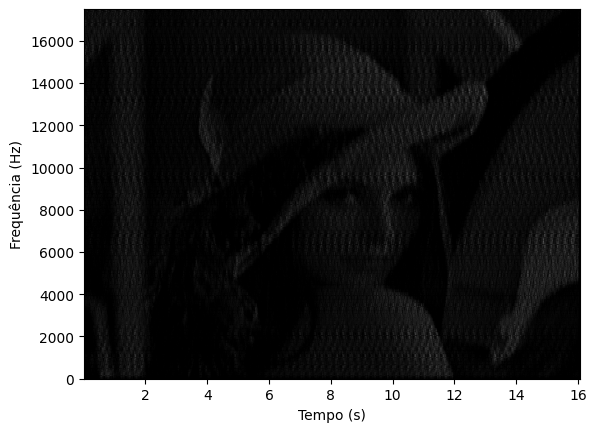

In [ ]:
# plotando o espectrograma do sinal
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='gray')
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.ylim(0,17500) # so para recortar a parte sem informacao
plt.show()

##### Variando os parâmetros

###### nperseg: número de amostras por janela

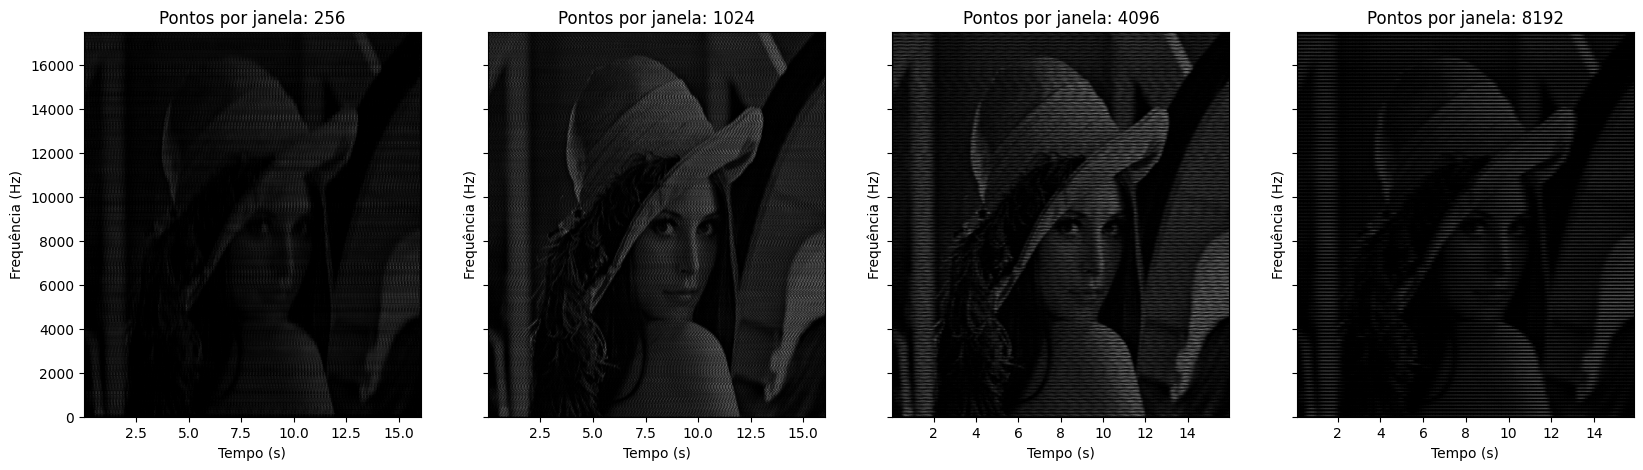

In [ ]:
# variando os tamanhos das amostras por janela
npersegs = [256, 1024, 4096, 8192] # 256 e o valor padrao

fig, ax = plt.subplots(1,len(npersegs),sharey=True)
fig.set_figwidth(20)
fig.set_figheight(5)

for index, nperseg in enumerate(npersegs):

  # extraindo o espectrograma
  f2, t2, Sxx2 = signal.spectrogram(lena, samplerate,
                                #window=('tukey', 0.25),
                                nperseg=nperseg,
                                noverlap=None,
                                nfft=None)

  # plotando o espectrograma do sinal
  ax[index].pcolormesh(t2, f2, Sxx2, shading='gouraud', cmap='gray')
  ax[index].set_ylabel('Frequência (Hz)')
  ax[index].set_xlabel('Tempo (s)')
  ax[index].set_title(f'Pontos por janela: {nperseg}')
  ax[index].set_ylim(0,17500) # so para recortar a parte sem informacao

plt.show()

###### noverlap: número de pontos que serão sobrepostos nas janelas

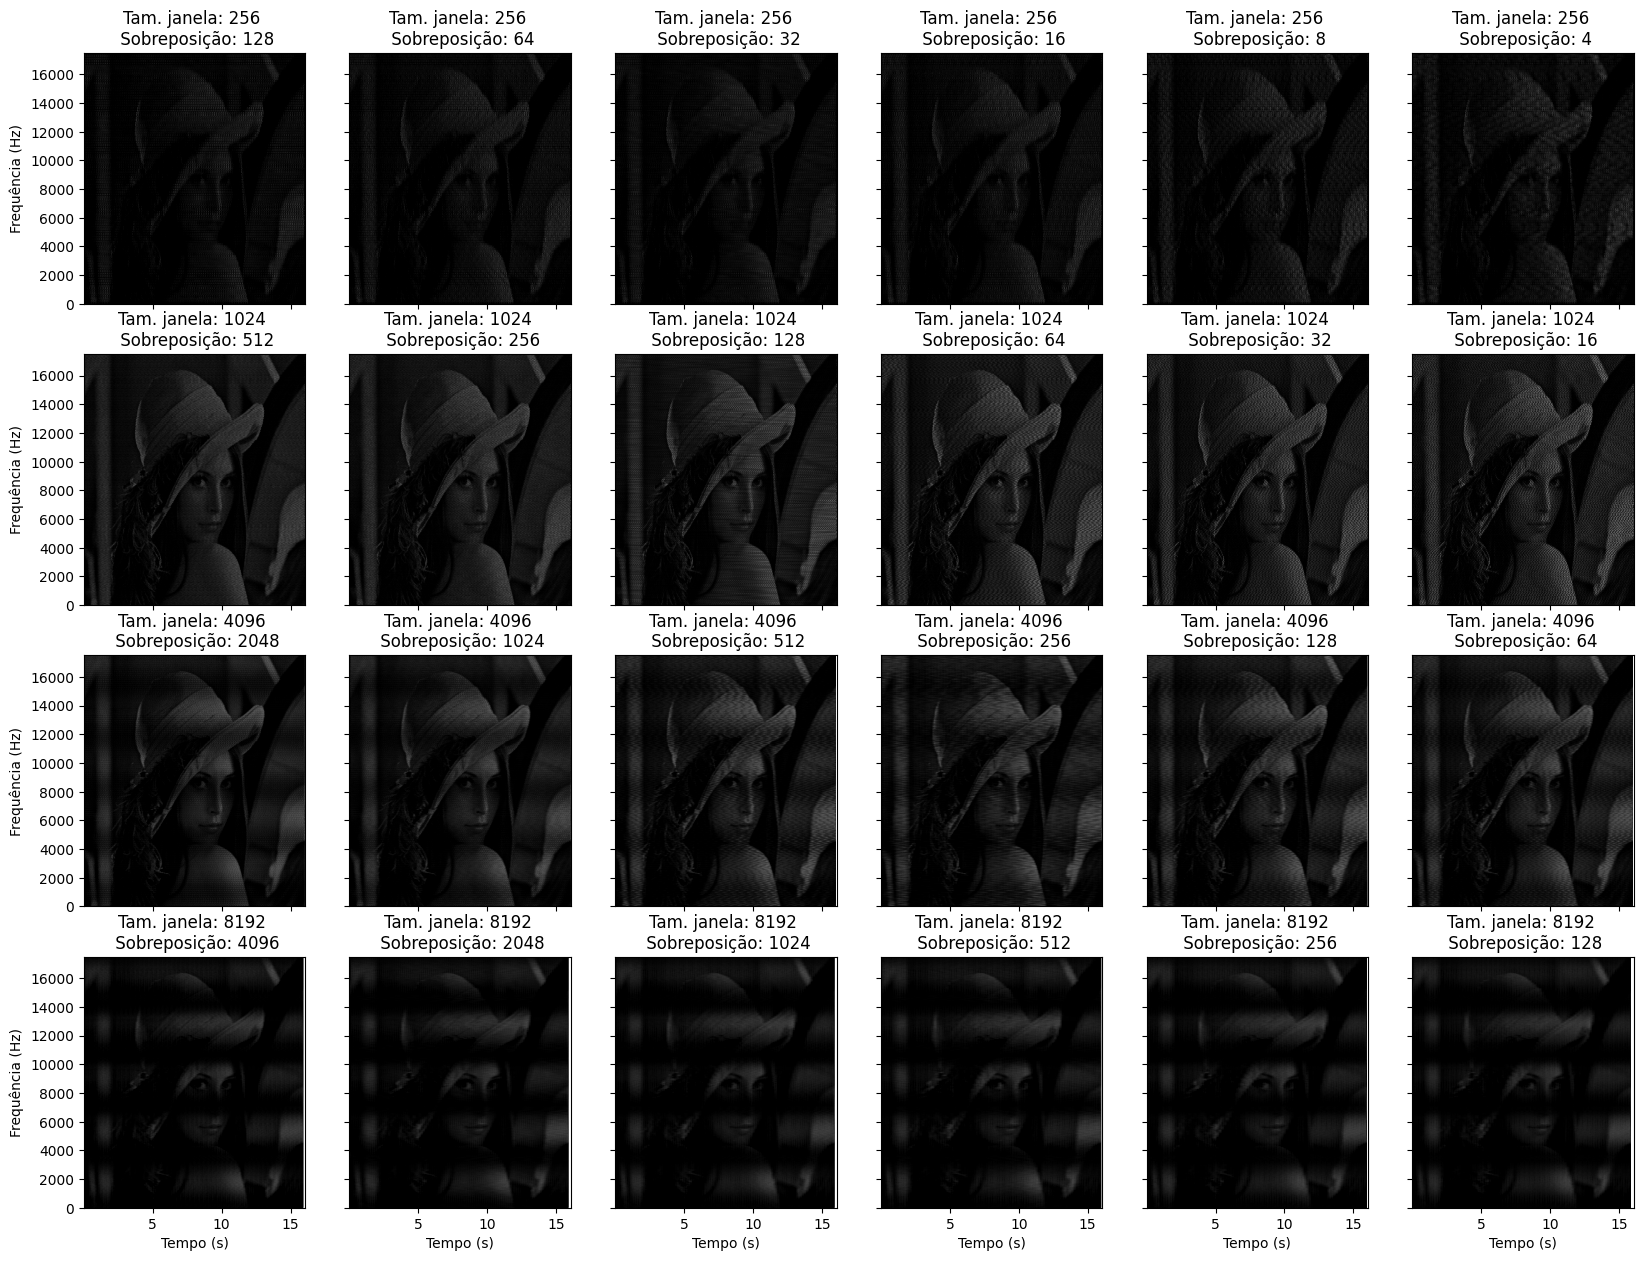

In [ ]:
# variando os pontos em sobreposicao entre as janelas
noverlaps = [2, 4, 8, 16, 32, 64]

fig, ax = plt.subplots(len(npersegs),len(noverlaps),sharey=True,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(15)

for index1, nperseg in enumerate(npersegs):
  for index2, noverlap in enumerate(noverlaps):
    # extraindo o espectrograma
    f3, t3, Sxx3 = signal.spectrogram(lena, samplerate,
                                  #window=('tukey', 0.25),
                                  nperseg=nperseg,
                                  noverlap=(nperseg // noverlap),
                                  nfft=None)
    # plotando o espectrograma do sinal
    ax[index1, index2].pcolormesh(t3, f3, Sxx3, shading='gouraud', cmap='gray')
    ax[index1, 0].set_ylabel('Frequência (Hz)')
    ax[len(npersegs)-1, index2].set_xlabel('Tempo (s)')
    ax[index1, index2].set_title(f'Tam. janela: {nperseg} \n Sobreposição: {nperseg // noverlap}')
    ax[index1, index2].set_ylim(0,17500) # so para recortar a parte sem informacao

plt.show()

###### nfft: número de frequências que serão analisadas

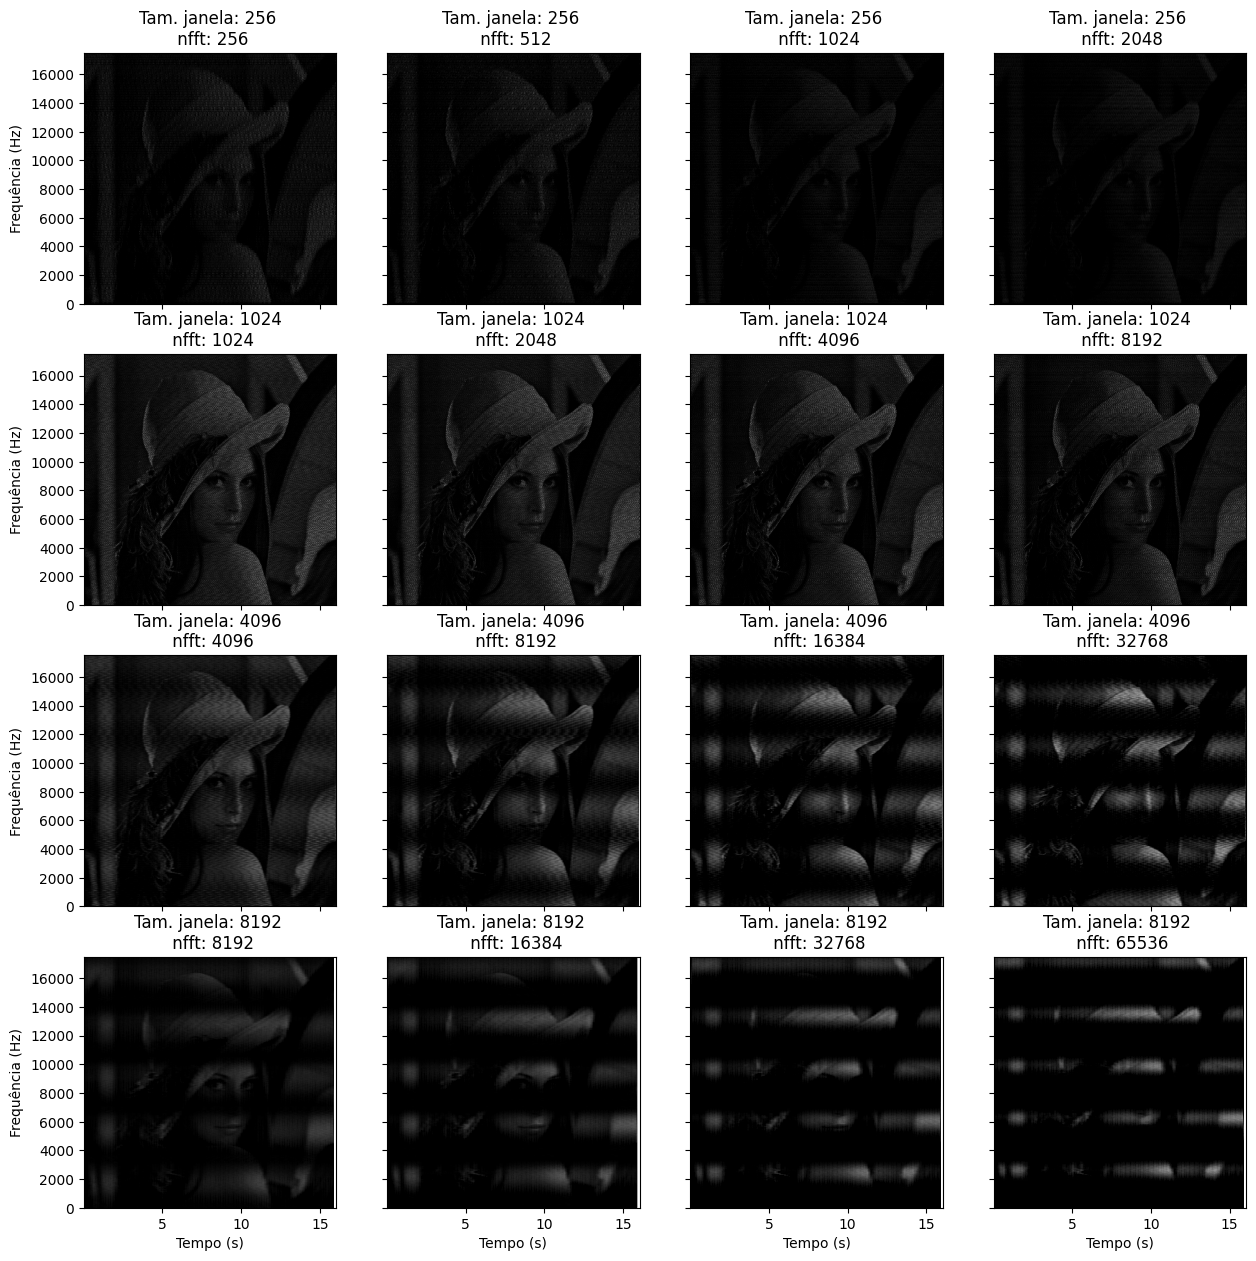

In [ ]:
# variando os pontos em sobreposicao entre as janelas
nffts = [1, 2, 4, 8]

fig, ax = plt.subplots(4,len(npersegs),sharey=True,sharex=True)
fig.set_figwidth(15)
fig.set_figheight(15)

for index1, nperseg in enumerate(npersegs):
  for index2, nfft in enumerate(nffts):
    # extraindo o espectrograma
    f3, t3, Sxx3 = signal.spectrogram(lena, samplerate,
                                  #window=('tukey', 0.25),
                                  nperseg=nperseg,
                                  noverlap=None,
                                  nfft=nperseg * nfft)
    # plotando o espectrograma do sinal
    ax[index1, index2].pcolormesh(t3, f3, Sxx3, shading='gouraud', cmap='gray')
    ax[index1, 0].set_ylabel('Frequência (Hz)')
    ax[len(npersegs)-1, index2].set_xlabel('Tempo (s)')
    ax[index1, index2].set_title(f'Tam. janela: {nperseg} \n nfft: {nperseg * nfft}')
    ax[index1, index2].set_ylim(0,17500) # so para recortar a parte sem informacao

plt.show()

### Resposta da Parte 3

O espectrograma obtido formou uma imagem. Isto foi feito a partir de um sinal de áudio que possui diferentes frequências em diferentes instantes de tempo. A transformada rápida de Fourier (FFT) calcula a energia do sinal para diferentes frequências.

Esta ferramenta pode ser utilizada para codificar imagens em áudios. E isso já foi utilizado até mesmo por terroristas (Al-Qaeda transmitia mensagens por meio de esteganografia, de acordo com o [The New York Times](https://www.nytimes.com/2001/10/30/science/veiled-messages-of-terror-may-lurk-in-cyberspace.html))!

> Quem ficou intrigado pode ver uma aplicação do que vimos acima em música. Acesse https://www.youtube.com/watch?v=M9xMuPWAZW8t=284s e ouça um pouco de música eletrônica.



## 4. Canto das baleias

Os cetáceos de grande porte, como golfinhos e baleias, são capazes de produzir padrões de som muito distintos, usando um aparato comparável ao humano em termos de complexidade. Existem indícios que estes chamados são a base de uma comunicação entre estes animais. Use seus conhecimentos sobre análise tempo X frequência para analisar os padrões de sons produzidos por este animais.

1. Carregue o arquivo whalecalls.mat usando o comando *loadmat* da biblioteca *scipy.io*. Este arquivo contém três variáveis: X1, X2 e fs. A variável fs é a frequência de amostragem. As variáveis X1 e X2 são matrizes onde cada linha é um chamado.

2. Ouça alguns trechos de cada matriz e descreva as diferenças entre ouvir os sons de X1 e X2.

3. Veja os espectrogramas dos sons das matrizes X1 e X2 (não se esqueça de variar os parâmetros da função espectrograma). Explique como o que se ouve corresponde com a imagem obtida pelo espectrograma. É possível enxergar algum padrão? Quais?

### Resposta da Parte 1.

In [ ]:
# importando bibliotecas
import numpy as np

from matplotlib import pyplot as plt
from scipy import io as sio


# biblioteca para tocar audio no python (Google Colab)
from IPython.display import Audio

In [ ]:
# carregando o arquivo whalecalls.mat do github

user = "nias-ufv"
repo = "elt576-processamento-inteligente-sinais"
diretorio = "semana-3"
arquivo = "whalecalls.mat"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{diretorio}/{arquivo}"
!wget --no-cache --backups=1 {url}

print(f"Arquivo {arquivo} carregado com sucesso! Confira o diretório de trabalho atual.")

--2025-01-31 00:05:38--  https://raw.githubusercontent.com/nias-ufv/elt576-processamento-inteligente-sinais/main/semana-3/whalecalls.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777389 (759K) [application/octet-stream]
Failed to rename whalecalls.mat to whalecalls.mat.1: (2) No such file or directory
Saving to: ‘whalecalls.mat’

whalecalls.mat      100%[===================>] 759.17K  --.-KB/s    in 0.06s   

2025-01-31 00:05:39 (13.5 MB/s) - ‘whalecalls.mat’ saved [777389/777389]

Arquivo whalecalls.mat carregado com sucesso! Confira o diretório de trabalho atual.


In [ ]:
# lendo o whalecalls.mat
whales = sio.loadmat("whalecalls.mat")

# extraindo as variaveis de interesse do .mat
fs = whales['fs'][0][0]
X1 = whales['X1']
X2 = whales['X2']

### Resposta da Parte 2.

In [ ]:
X1.shape

# cada uma das linhas das matrizes X1 e X2 é uma gravacao

(15, 13201)

In [ ]:
# tocando o chamado 0 de X1
Audio(X1[7][:],rate=fs, autoplay=True)

In [ ]:
X2.shape

(9, 13201)

In [ ]:
# tocando todas as faixas
faixa = 4 # 0 a 8
Audio(X2[faixa][:], rate=fs, autoplay=True)

Os áudios mostram dois chamados diferentes, nos quais todas as faixas de um mesmo chamado se parecem.

### Resposta da Parte 3.

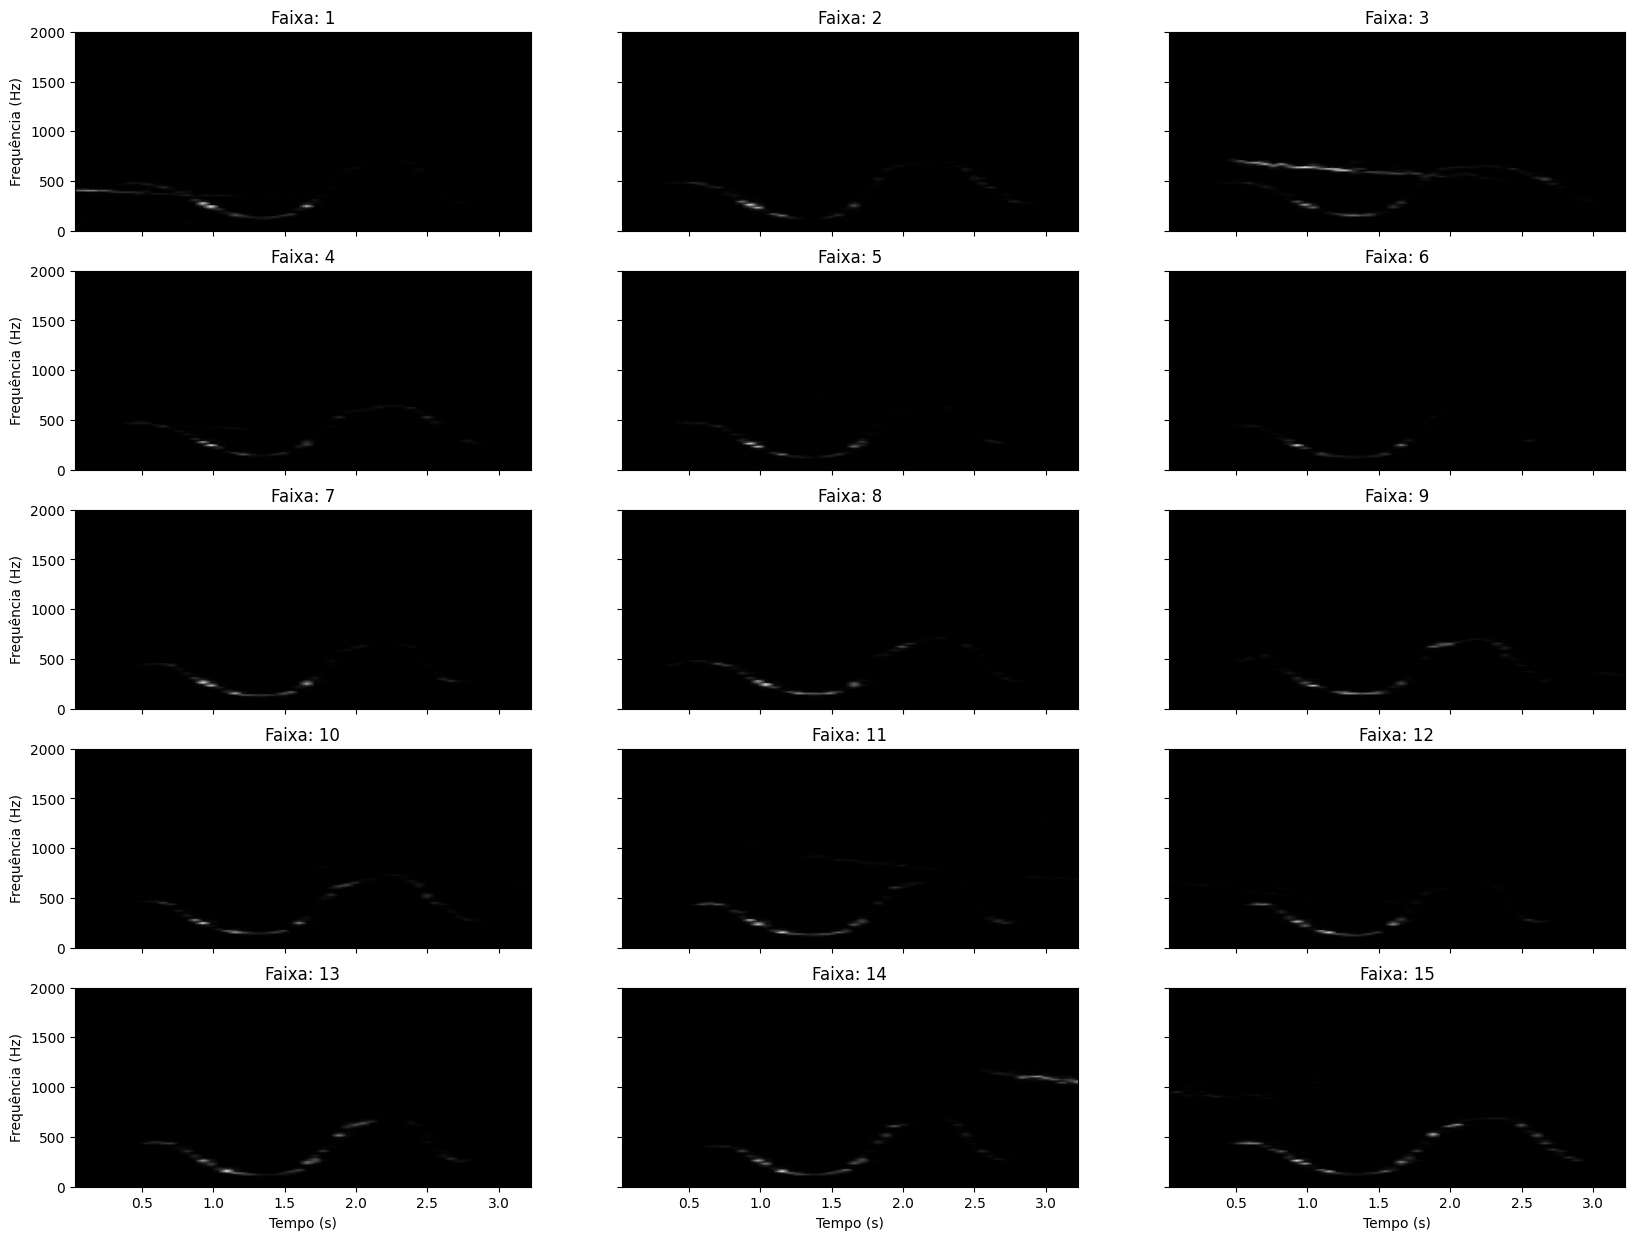

In [ ]:
# espectrogramas de X1

lines = 5
col = np.round(len(X1) / lines).astype(np.uint8)

fig, ax = plt.subplots(lines,col,sharey=True,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(15)

for index, x in enumerate(X1):
  f, t, Sxx = signal.spectrogram(x, fs,
                                #window=('tukey', 0.25),
                                nperseg=None,
                                noverlap=None,
                                nfft=None)
  # plotando o espectrograma do sinal
  ax[index//col , index % col].pcolormesh(t, f, Sxx, shading='gouraud', cmap='gray')
  ax[index//col , 0].set_ylabel('Frequência (Hz)')
  ax[lines-1, index % col].set_xlabel('Tempo (s)')
  ax[index//col , index % col].set_title(f'Faixa: {index+1}')
  #ax[index].set_ylim(0,17500) # so para recortar a parte sem informacao

plt.show()

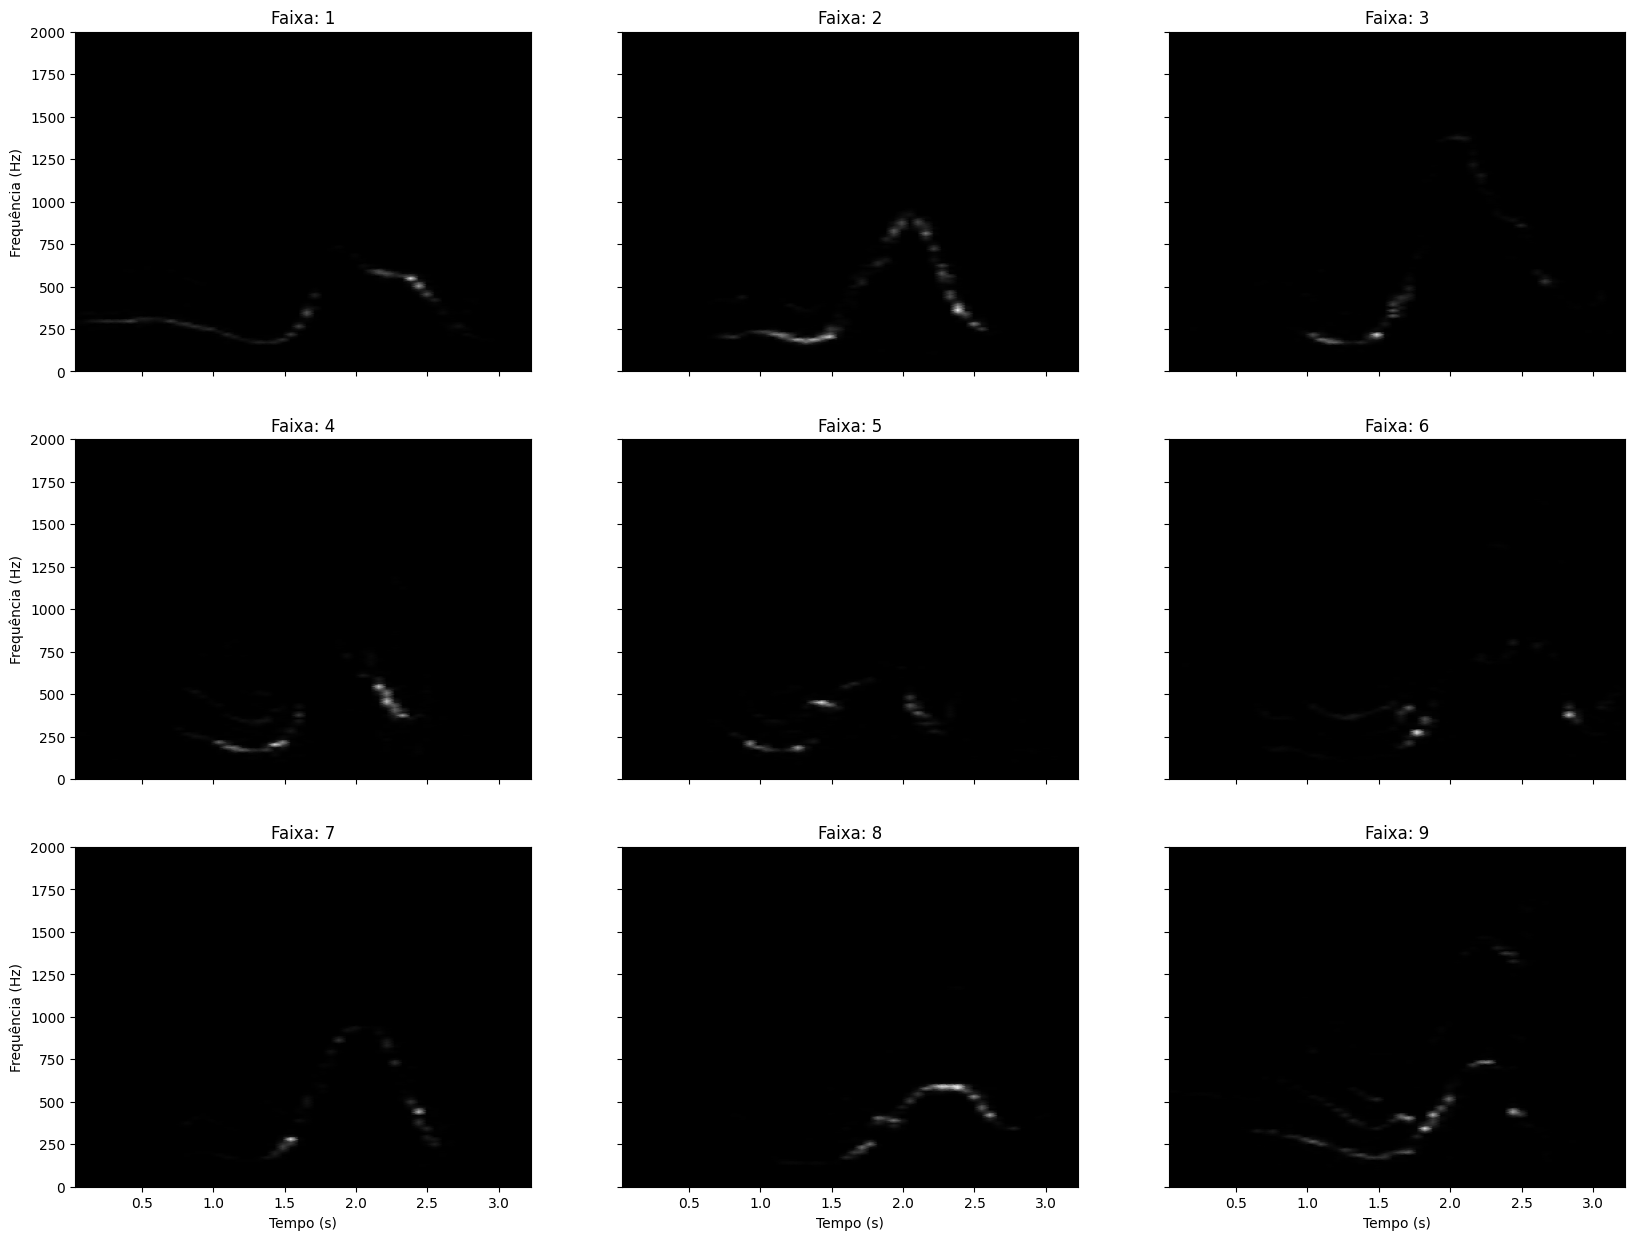

In [ ]:
# espectrogramas de X2

lines = 3
col = np.round(len(X2) / lines).astype(np.uint8)

fig, ax = plt.subplots(lines,col,sharey=True,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(15)

for index, x in enumerate(X2):
  f, t, Sxx = signal.spectrogram(x, fs,
                                #window=('tukey', 0.25),
                                nperseg=None,
                                noverlap=None,
                                nfft=None)
  # plotando o espectrograma do sinal
  ax[index//col , index % col].pcolormesh(t, f, Sxx, shading='gouraud', cmap='gray')
  ax[index//col , 0].set_ylabel('Frequência (Hz)')
  ax[lines-1, index % col].set_xlabel('Tempo (s)')
  ax[index//col , index % col].set_title(f'Faixa: {index+1}')
  #ax[index].set_ylim(0,17500) # so para recortar a parte sem informacao

plt.show()

Os espectrogramas de X1 e X2 possuem uma onda semelhante para todas as faixas.

#### Conheça o canto das baleias

[BBC - Canto das baleias](https://www.bbc.com/portuguese/articles/c51ylqgg8lwo)